In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

if __name__ == "__main__":
    df_train = pd.read_csv("aozora_8writers_multiple_train.csv",  delimiter=',')
    le = LabelEncoder()
    le = le.fit(df_train["label"])
    df_train["num_label"] = le.transform(df_train["label"])
    df_train = shuffle(df_train)

    train_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_train, df_train["num_label"], num_epochs=None, shuffle=True)

    df_test = pd.read_csv("aozora_8writers_multiple_test.csv",  delimiter=',')
    df_test["num_label"] = le.transform(df_test["label"])
    
    predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_test, df_test["num_label"], shuffle=False)

    embedded_text_feature_column = hub.text_embedding_column(
        key="text", 
        module_spec="https://tfhub.dev/google/nnlm-ja-dim128/1")

    estimator = tf.estimator.DNNClassifier(
        hidden_units=[512, 256, 128, 64],
        feature_columns=[embedded_text_feature_column],
        n_classes=8,
        optimizer=tf.train.AdagradOptimizer(learning_rate=0.03))

    estimator.train(input_fn=train_input_fn, steps=2000);
    test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
    print("Test set accuracy: {accuracy}".format(**test_eval_result))

W0625 23:31:38.288357 4402832832 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


INFO:tensorflow:Using default config.


I0625 23:31:38.781162 4402832832 estimator.py:1739] Using default config.


W0625 23:31:38.787159 4402832832 estimator.py:1760] Using temporary folder as model directory: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x122716a10>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


I0625 23:31:38.791162 4402832832 estimator.py:201] Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x122716a10>, '_model_dir': '/var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


Instructions for updating:
Colocations handled automatically by placer.


W0625 23:31:38.811366 4402832832 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0625 23:31:38.829576 4402832832 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: __init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0625 23:31:38.834564 4402832832 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Calling model_fn.


I0625 23:31:38.848397 4402832832 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0625 23:31:38.893825 4402832832 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0625 23:31:38.938667 4402832832 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use tf.cast instead.


W0625 23:31:39.119996 4402832832 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow_estimator/python/estimator/canned/head.py:436: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


INFO:tensorflow:Done calling model_fn.


I0625 23:31:39.322645 4402832832 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


I0625 23:31:39.325836 4402832832 basic_session_run_hooks.py:527] Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


I0625 23:31:39.574137 4402832832 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Running local_init_op.


I0625 23:31:40.309190 4402832832 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0625 23:31:40.957099 4402832832 session_manager.py:493] Done running local_init_op.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0625 23:31:40.987045 4402832832 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py:809: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt.


I0625 23:31:41.453097 4402832832 basic_session_run_hooks.py:594] Saving checkpoints for 0 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt.


INFO:tensorflow:loss = 265.7324, step = 1


I0625 23:31:43.343086 4402832832 basic_session_run_hooks.py:249] loss = 265.7324, step = 1


INFO:tensorflow:global_step/sec: 130.297


I0625 23:31:44.110177 4402832832 basic_session_run_hooks.py:680] global_step/sec: 130.297


INFO:tensorflow:loss = 218.79454, step = 101 (0.771 sec)


I0625 23:31:44.113986 4402832832 basic_session_run_hooks.py:247] loss = 218.79454, step = 101 (0.771 sec)


INFO:tensorflow:global_step/sec: 134.572


I0625 23:31:44.853270 4402832832 basic_session_run_hooks.py:680] global_step/sec: 134.572


INFO:tensorflow:loss = 176.72278, step = 201 (0.744 sec)


I0625 23:31:44.857825 4402832832 basic_session_run_hooks.py:247] loss = 176.72278, step = 201 (0.744 sec)


INFO:tensorflow:global_step/sec: 144.908


I0625 23:31:45.543371 4402832832 basic_session_run_hooks.py:680] global_step/sec: 144.908


INFO:tensorflow:loss = 154.32584, step = 301 (0.690 sec)


I0625 23:31:45.548240 4402832832 basic_session_run_hooks.py:247] loss = 154.32584, step = 301 (0.690 sec)


INFO:tensorflow:global_step/sec: 126.704


I0625 23:31:46.332609 4402832832 basic_session_run_hooks.py:680] global_step/sec: 126.704


INFO:tensorflow:loss = 163.04498, step = 401 (0.789 sec)


I0625 23:31:46.337066 4402832832 basic_session_run_hooks.py:247] loss = 163.04498, step = 401 (0.789 sec)


INFO:tensorflow:global_step/sec: 136.475


I0625 23:31:47.065382 4402832832 basic_session_run_hooks.py:680] global_step/sec: 136.475


INFO:tensorflow:loss = 150.48578, step = 501 (0.732 sec)


I0625 23:31:47.069463 4402832832 basic_session_run_hooks.py:247] loss = 150.48578, step = 501 (0.732 sec)


INFO:tensorflow:global_step/sec: 137.155


I0625 23:31:47.794447 4402832832 basic_session_run_hooks.py:680] global_step/sec: 137.155


INFO:tensorflow:loss = 120.86284, step = 601 (0.731 sec)


I0625 23:31:47.800378 4402832832 basic_session_run_hooks.py:247] loss = 120.86284, step = 601 (0.731 sec)


INFO:tensorflow:global_step/sec: 146.546


I0625 23:31:48.476824 4402832832 basic_session_run_hooks.py:680] global_step/sec: 146.546


INFO:tensorflow:loss = 103.11734, step = 701 (0.680 sec)


I0625 23:31:48.480180 4402832832 basic_session_run_hooks.py:247] loss = 103.11734, step = 701 (0.680 sec)


INFO:tensorflow:global_step/sec: 137.396


I0625 23:31:49.204649 4402832832 basic_session_run_hooks.py:680] global_step/sec: 137.396


INFO:tensorflow:loss = 127.05843, step = 801 (0.728 sec)


I0625 23:31:49.208164 4402832832 basic_session_run_hooks.py:247] loss = 127.05843, step = 801 (0.728 sec)


INFO:tensorflow:global_step/sec: 137.839


I0625 23:31:49.930130 4402832832 basic_session_run_hooks.py:680] global_step/sec: 137.839


INFO:tensorflow:loss = 101.858765, step = 901 (0.726 sec)


I0625 23:31:49.933793 4402832832 basic_session_run_hooks.py:247] loss = 101.858765, step = 901 (0.726 sec)


INFO:tensorflow:global_step/sec: 135.862


I0625 23:31:50.666169 4402832832 basic_session_run_hooks.py:680] global_step/sec: 135.862


INFO:tensorflow:loss = 94.62993, step = 1001 (0.739 sec)


I0625 23:31:50.672369 4402832832 basic_session_run_hooks.py:247] loss = 94.62993, step = 1001 (0.739 sec)


INFO:tensorflow:global_step/sec: 127.895


I0625 23:31:51.448060 4402832832 basic_session_run_hooks.py:680] global_step/sec: 127.895


INFO:tensorflow:loss = 101.09706, step = 1101 (0.780 sec)


I0625 23:31:51.452383 4402832832 basic_session_run_hooks.py:247] loss = 101.09706, step = 1101 (0.780 sec)


INFO:tensorflow:global_step/sec: 118.565


I0625 23:31:52.291479 4402832832 basic_session_run_hooks.py:680] global_step/sec: 118.565


INFO:tensorflow:loss = 110.41204, step = 1201 (0.843 sec)


I0625 23:31:52.295804 4402832832 basic_session_run_hooks.py:247] loss = 110.41204, step = 1201 (0.843 sec)


INFO:tensorflow:global_step/sec: 121.69


I0625 23:31:53.113245 4402832832 basic_session_run_hooks.py:680] global_step/sec: 121.69


INFO:tensorflow:loss = 105.45618, step = 1301 (0.822 sec)


I0625 23:31:53.118107 4402832832 basic_session_run_hooks.py:247] loss = 105.45618, step = 1301 (0.822 sec)


INFO:tensorflow:global_step/sec: 132.95


I0625 23:31:53.865413 4402832832 basic_session_run_hooks.py:680] global_step/sec: 132.95


INFO:tensorflow:loss = 94.96791, step = 1401 (0.752 sec)


I0625 23:31:53.869755 4402832832 basic_session_run_hooks.py:247] loss = 94.96791, step = 1401 (0.752 sec)


INFO:tensorflow:global_step/sec: 131.361


I0625 23:31:54.626693 4402832832 basic_session_run_hooks.py:680] global_step/sec: 131.361


INFO:tensorflow:loss = 93.82866, step = 1501 (0.761 sec)


I0625 23:31:54.630609 4402832832 basic_session_run_hooks.py:247] loss = 93.82866, step = 1501 (0.761 sec)


INFO:tensorflow:global_step/sec: 126.995


I0625 23:31:55.414107 4402832832 basic_session_run_hooks.py:680] global_step/sec: 126.995


INFO:tensorflow:loss = 91.95877, step = 1601 (0.787 sec)


I0625 23:31:55.417186 4402832832 basic_session_run_hooks.py:247] loss = 91.95877, step = 1601 (0.787 sec)


INFO:tensorflow:global_step/sec: 132.365


I0625 23:31:56.169609 4402832832 basic_session_run_hooks.py:680] global_step/sec: 132.365


INFO:tensorflow:loss = 94.08577, step = 1701 (0.756 sec)


I0625 23:31:56.173075 4402832832 basic_session_run_hooks.py:247] loss = 94.08577, step = 1701 (0.756 sec)


INFO:tensorflow:global_step/sec: 122.683


I0625 23:31:56.984702 4402832832 basic_session_run_hooks.py:680] global_step/sec: 122.683


INFO:tensorflow:loss = 90.099266, step = 1801 (0.818 sec)


I0625 23:31:56.991184 4402832832 basic_session_run_hooks.py:247] loss = 90.099266, step = 1801 (0.818 sec)


INFO:tensorflow:global_step/sec: 131.562


I0625 23:31:57.744801 4402832832 basic_session_run_hooks.py:680] global_step/sec: 131.562


INFO:tensorflow:loss = 84.150894, step = 1901 (0.757 sec)


I0625 23:31:57.748126 4402832832 basic_session_run_hooks.py:247] loss = 84.150894, step = 1901 (0.757 sec)


INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt.


I0625 23:31:58.446089 4402832832 basic_session_run_hooks.py:594] Saving checkpoints for 2000 into /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt.


INFO:tensorflow:Loss for final step: 83.79902.


I0625 23:32:00.718195 4402832832 estimator.py:359] Loss for final step: 83.79902.


INFO:tensorflow:Calling model_fn.


I0625 23:32:00.744903 4402832832 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0625 23:32:00.771987 4402832832 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0625 23:32:00.817462 4402832832 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0625 23:32:01.149663 4402832832 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-06-25T14:32:01Z


I0625 23:32:01.171344 4402832832 evaluation.py:257] Starting evaluation at 2019-06-25T14:32:01Z


INFO:tensorflow:Graph was finalized.


I0625 23:32:01.304703 4402832832 monitored_session.py:222] Graph was finalized.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0625 23:32:01.307862 4402832832 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt-2000


I0625 23:32:01.314126 4402832832 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt-2000


INFO:tensorflow:Running local_init_op.


I0625 23:32:02.004340 4402832832 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0625 23:32:02.597867 4402832832 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-06-25-14:32:03


I0625 23:32:03.130346 4402832832 evaluation.py:277] Finished evaluation at 2019-06-25-14:32:03


INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.6755652, average_loss = 0.9337939, global_step = 2000, loss = 117.658035


I0625 23:32:03.133999 4402832832 estimator.py:1979] Saving dict for global step 2000: accuracy = 0.6755652, average_loss = 0.9337939, global_step = 2000, loss = 117.658035


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt-2000


I0625 23:32:03.238677 4402832832 estimator.py:2039] Saving 'checkpoint_path' summary for global step 2000: /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt-2000


Test set accuracy: 0.675565183163


In [2]:
print le.classes_

['akutagawa' 'kenji' 'rampo' 'rohan' 'souseki' 'takiji' 'tanizaki'
 'touson']


INFO:tensorflow:Calling model_fn.


I0625 23:32:29.422908 4402832832 estimator.py:1111] Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0625 23:32:29.446775 4402832832 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0625 23:32:29.502202 4402832832 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


I0625 23:32:29.673588 4402832832 estimator.py:1113] Done calling model_fn.


INFO:tensorflow:Graph was finalized.


I0625 23:32:29.796330 4402832832 monitored_session.py:222] Graph was finalized.


INFO:tensorflow:Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt-2000


I0625 23:32:29.801131 4402832832 saver.py:1270] Restoring parameters from /var/folders/yn/9h_42l352g739rm66y_3yznh0000gn/T/tmp6lAqWe/model.ckpt-2000


INFO:tensorflow:Running local_init_op.


I0625 23:32:30.471470 4402832832 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0625 23:32:31.056622 4402832832 session_manager.py:493] Done running local_init_op.


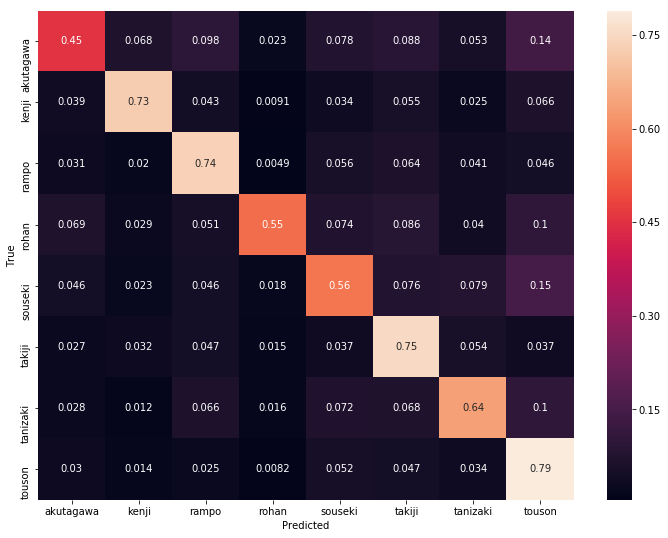

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

# LABELS = range(8)
LABELS = ["akutagawa", "kenji", "rampo", "rohan",
          "souseki", "takiji", "tanizaki", "touson"]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(df_test["num_label"], 
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))
sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

In [5]:
df_res = pd.read_csv("aozora_8writers_multiple_test_prediction_result_automl_wo_text.csv",  delimiter=',')

le2 = LabelEncoder()
le2 = le2.fit(df_res["true_label"])
df_res["num_true_label"] = le2.transform(df_res["true_label"])
df_res["num_predict_label"] = le2.transform(df_res["predict_label"])

print le2.classes_

from sklearn.metrics import accuracy_score
print accuracy_score(df_res["true_label"], df_res["predict_label"])

['akutagawa' 'kenji' 'rampo' 'rohan' 'souseki' 'takiji' 'tanizaki'
 'touson']
0.8851709195955705


Text(87,0.5,'True')

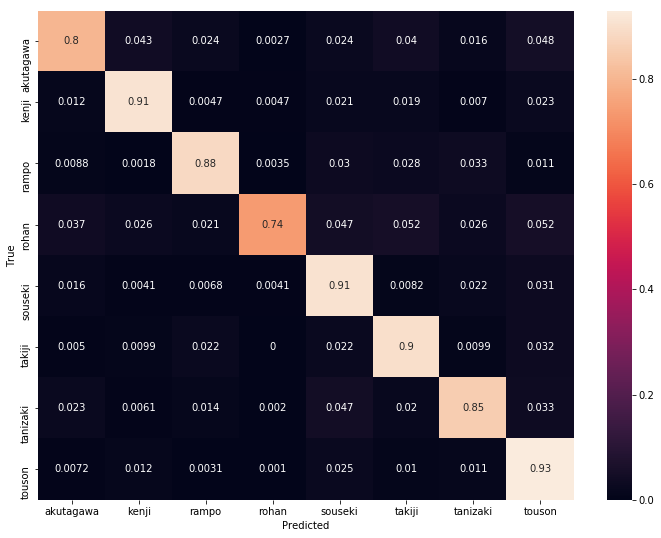

In [6]:
LABELS = ["akutagawa", "kenji", "rampo", "rohan",
          "souseki", "takiji", "tanizaki", "touson"]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(df_res["num_true_label"], df_res["num_predict_label"])
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))
sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True")